In [368]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

## Question 1
##### 1.1)

In [369]:
def generic_grad(f, gf, lsearch, x0, eps):
    fs = []
    gs = []
    ts = []
    start = time()
    x_k = x0
    fs.append(f(x_k))
    gs.append(np.linalg.norm(gf(x_k)))
    ts.append(time()-start)
    while True:
        t = lsearch(f, x_k, gf(x_k))
        x_k_1 = x_k - t * gf(x_k)
        fs.append(f(x_k_1))
        gs.append(np.linalg.norm(gf(x_k_1)))
        ts.append(time()-start)
        if abs(f(x_k)-f(x_k_1)) <= eps:
            break
        x_k = x_k_1
    fs = np.array(fs)
    gs = np.array(gs)
    
    return x_k_1, fs, gs, ts

##### 1.2)

In [370]:
def const_step(s):
    if s <= 0:
        raise ValueError("S should be positive.")

    def inner_func(f, xk, gk):
        return s

    return inner_func

In [371]:
def exact_quad(A):
    try:
        np.linalg.cholesky(A)

        def inner_func(f, xk, gk):
            return 0.5 * ((np.linalg.norm(gk) / np.linalg.norm(A @ gk)) ** 2)

        return inner_func
    except:
        raise ValueError("A Incompatable")

In [372]:
def back(alpha, beta, s):
    if alpha <= 0 or beta <= 0 or alpha >= 1 or beta >= 1 or s <= 0:
        raise ValueError("Incompatible values.")

    def inner_func(f, xk, gk):
        t = s
        while f(xk - t * gk) >= f(xk) - alpha * t * np.linalg.norm(gk) ** 2:
            t *= beta
        return t

    return inner_func

##### 1.3)

In [373]:
A = np.arange(1, 26).reshape((5, 5))
np.fill_diagonal(A, 100)
f = lambda x: (x.T @ A.T @ A @ x)[0][0]
gf = lambda x: 2 * A.T @ A @ x
x0 = np.ones((5, 1))
s = 1 / (2 * max(np.linalg.eigvals(A.T @ A)))

In [374]:
x1, fs1, gs1, ts1 = generic_grad(f, gf, const_step(s), x0, 10 ** -5)

In [375]:
x2, fs2, gs2, ts2 = generic_grad(f, gf, exact_quad(A), x0, 10 ** -5)

In [376]:
x3, fs3, gs3, ts3 = generic_grad(f, gf, back(0.5, 0.5, 1), x0, 10 ** -5)

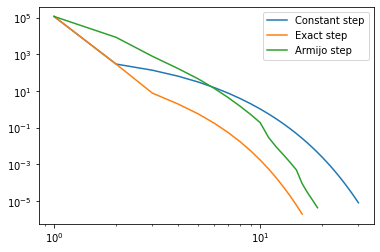

In [377]:
plt.loglog(np.linspace(1,len(ts1),len(ts1)),fs1, label="Constant step")
plt.loglog(np.linspace(1,len(ts2),len(ts2)),fs2, label="Exact step")
plt.loglog(np.linspace(1,len(ts3),len(ts3)),fs3, label="Armijo step")
plt.legend()
plt.show()

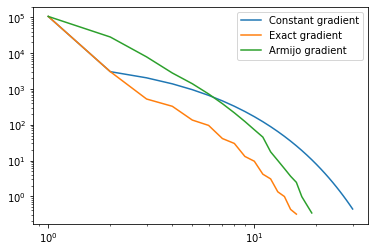

In [378]:
plt.loglog(np.linspace(1,len(ts1),len(ts1)),gs1, label="Constant gradient")
plt.loglog(np.linspace(1,len(ts2),len(ts2)),gs2, label="Exact gradient")
plt.loglog(np.linspace(1,len(ts3),len(ts3)),gs3, label="Armijo gradient")
plt.legend()
plt.show()

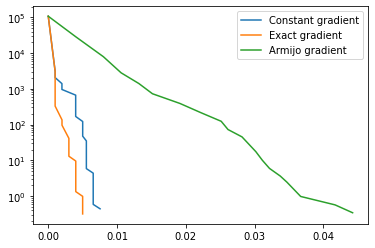

In [379]:
plt.semilogy(ts1, gs1, label="Constant gradient")
plt.semilogy(ts2, gs2, label="Exact gradient")
plt.semilogy(ts3, gs3, label="Armijo gradient")
plt.legend()
plt.show()

## Question 2
#### 2.5)

In [380]:
O_mat = np.array([[1, 0, 0, -1, -1, -1, -1, -1, 0],
              [0, 1, -1, -1, -1, -1, -1, -1, -1],
              [1, 1, -1, -1, -1, -1, -1, -1, -1],
              [0, 0, -1, 1, -1, -1, -1, -1, -1],
              [-1, -1, -1, 1, 1, 1, 1, 1, 0],
              [-1, -1, 1, 1, 1, 0, 1, 0, 1],
              [-1, -1, 1, 1, 1, 1, 1, 1, 1],
              [-1, -1, 1, 1, 0, 1, 1, 0, 0]])

In [381]:
O_adj = np.array([[np.linalg.norm(row-row_2) for row_2 in O_mat] for row in O_mat])
f = lambda X: 0.5 * sum([sum([(np.linalg.norm(var-var_2) ** 2 - O_adj[i][j]**2)**2 for j,var_2 in enumerate(X)])\
                       for i,var in enumerate(X)])
gf = lambda X: 4 * np.array([np.sum(np.array([(var-var_2)*(np.linalg.norm(var-var_2) ** 2 - O_adj[i][j] ** 2) \
                                          for j, var_2 in enumerate(X)]), axis= 0)\
                                          for i,var in enumerate(X)])

In [382]:
x,fs,gs,ts = generic_grad(f, gf, const_step(0.001), np.random.rand(8, 2), 10 ** -5)

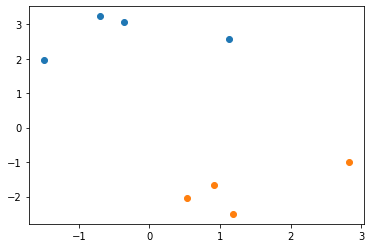

In [383]:
dem = x[:4].T
rep = x[4:9].T
plt.scatter(dem[0],dem[1])
plt.scatter(rep[0],rep[1])
plt.show()

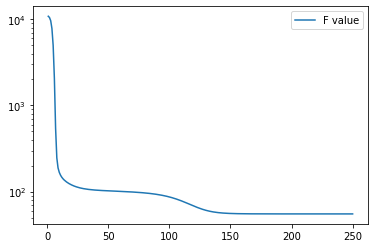

In [384]:
plt.semilogy(np.linspace(1,250,250),fs[:250], label="F value")
plt.legend()
plt.show()

It can clearly be seen that the function indeed converges as the values of the function seem to reach a minimum value as the iterations grow, and once it has reached it

## Question 3
#### 3.3)

In [385]:
def noise_generic_grad(f, gf, lsearch, x0, eps, mu, sigma):
    fs = []
    gs = []
    ts = []
    start = time()
    x_k = x0
    fs.append(f(x_k))
    while True:
        t = lsearch(f, x_k, gf(x_k))
        x_k_1 = x_k - t * gf(x_k) + np.random.normal(mu,sigma,size=x_k.size)
        fs.append(f(x_k_1))
        if abs(f(x_k)-f(x_k_1)) <= eps:
            break
        x_k = x_k_1
    fs = np.array(fs)
    return x_k_1, fs

In [386]:
def generic_grad_3(f, gf, lsearch, x0, eps):
    fs = []
    gs = []
    ts = []
    start = time()
    x_k = x0
    fs.append(f(x_k))
    while True:
        t = lsearch(f, x_k, gf(x_k))
        x_k_1 = x_k - t * gf(x_k)
        fs.append(f(x_k_1))
        if abs(f(x_k)-f(x_k_1)) <= eps:
            break
        x_k = x_k_1
    fs = np.array(fs)
    return x_k_1, fs

In [387]:
def ex3 (mu,sigma, x0, eps):
    f = lambda x: x[0] ** 2 + x[1] ** 4 - x[1] ** 2
    gf = lambda x: np.array([2 * x[0], 4 * x[1] ** 3 - 2*x[1]])
    t = 1/10
    x_noise, fs_noise = noise_generic_grad(f,gf,const_step(t),x0,eps,mu,sigma)
    x,fs = generic_grad_3(f,gf,const_step(t),x0,eps)
    return x, x_noise, fs, fs_noise

In [388]:
x, x_noise, fs, fs_noise = ex3(0,0.0005,np.array([100,0]),10 ** -8)

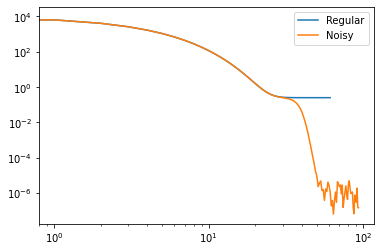

In [389]:
plt.loglog(fs+0.25, label="Regular")
plt.loglog(fs_noise+0.25, label="Noisy")
plt.legend()
plt.show()